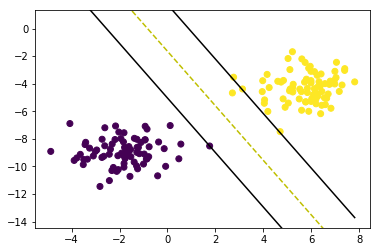

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

def train_svm(X_train,y_train):
    w=[0,0]
    b=0
    data=X_train
    label=y_train
    for i in range(1000):
        for j in range(len(data)):
            m=((w[0]*data[j][0])+(w[1]*data[j][1])-b)  
            if (m*label[j])>=1:
                w[0]-=0.001*(2*0.01*w[0])
                w[1]-=0.001*(2*0.01*w[1])
            else:
                w[0]-=0.001*(2*0.01*w[0]-(data[j][0]*label[j]))
                w[1]-=0.001*(2*0.01*w[1]-(data[j][1]*label[j]))
                b-=0.001*label[j]
    return w,b

def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

def main():    
    X,y =make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.05, random_state=40)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
    y_train = np.where(y_train <= 0, -1, 1)
    y_test=np.where(y_test<=0,-1,1)
    color=y_train
    w,b=train_svm(X_train,y_train)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
    x0_1 = np.amin(X_train[:,0])
    x0_2 = np.amax(X_train[:,0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X_train[:,1])
    x1_max = np.amax(X_train[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

if __name__=='__main__':
    main()